In [2]:
# Import required libraries
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import scipy.stats
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Step #1: Obtain failure times

# For the following example, 1000 random points will be generated from a known distribution (i.e. beta distribution)
# However, most likely the distribution following the data will be unknown

# Specify the sample size
size = 1000
x = scipy.arange(size)

# Generate the data
y = scipy.stats.beta.rvs(6, 2, size=size, random_state=40)*50 # real data from unknown distribution would be here

In [4]:
# Step #2: Identify the distribution that best fits the data

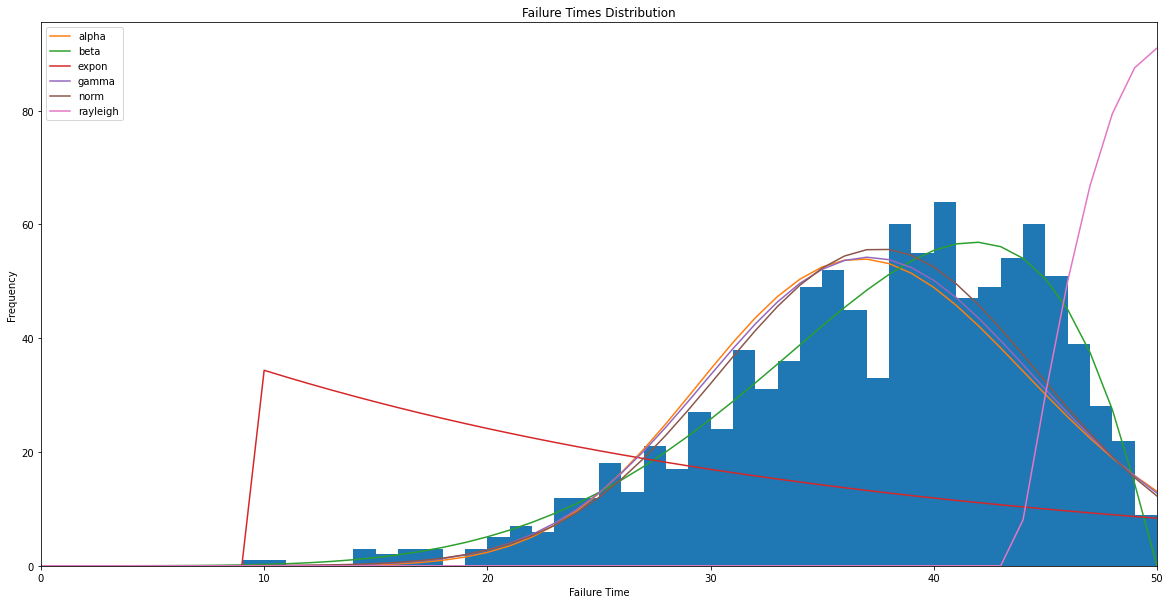

<Figure size 432x288 with 0 Axes>

In [5]:

# Build histogram
plt.figure(figsize=(20,10))
h = plt.hist(y, bins=range(51))

# List the distributions to be fitted
dist_names = ['alpha', 'beta', 'expon', 'gamma', 'norm', 'rayleigh']

# Fit the distributions to the data and plot their probability density functions
for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(y)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])*size
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0,50)
plt.legend(loc='upper left')
plt.title("Failure Times Distribution")
plt.xlabel("Failure Time")
plt.ylabel("Frequency")
plt.show()

plt.savefig("C:/Users/renea/Desktop/Failure_times_distribution.png", dpi=350)

In [4]:
# Step #3: Obtain the distribution parameters

In [5]:
# Define the distribution with the best fit
dist = getattr(scipy.stats, 'beta')

# Fit the distribution to the data
param = dist.fit(y)

# Distribution parameters (e.g. 'a', 'b' for beta distribution)
args = param[:-2]

# Location parameter
loc = param[-2]

# Scale parameter
scale = param[-1]

In [6]:
# Step #4: Obtain probabilities

In [7]:
# Probability of failure before time t
print("Probability of failure before time 40:", round(scipy.stats.beta.cdf(40, *args, loc=loc, scale=scale)*100,2),"%")
# Probability of failure before time 40: 57.32 %

# Reliability estimation after time t
print("Reliability Estimation at time 40:", round(scipy.stats.beta.sf(40, *args, loc=loc, scale=scale)*100,2),"%")
# Reliability Estimation at time 40: 42.68 %

Probability of failure before time 40: 57.32 %
Reliability Estimation at time 40: 42.68 %
